<a href="https://colab.research.google.com/github/DvirHayat/BAYU-Net/blob/main/YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## YOLOv8 Module

###  Install required libraries

In [ ]:
# Install the ultralytics package
!pip install ultralytics

# Install the roboflow package
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import Image, display
from datetime import datetime
from roboflow import Roboflow
import ipywidgets as widgets
import locale # for Roboflow encoding
import io
import random
import os
import cv2
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
HOME_PATH = os.getcwd()
print(HOME_PATH)

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import a pre-trained model.
We are using a basic segmentation YOLOv8 model.
Later this model will be fine tuned by roboflow dataset.

In [ ]:
#Instance
model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8n-seg.pt')  # Transfer the weights from a pretrained model (recommended for training)

100%|██████████| 6.74M/6.74M [00:00<00:00, 118MB/s]


### Define RoboFlow Pipeline

In [ ]:
#Ensure consistent encoding behavior (for RoboFlow)
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
# Load the information from Roboflow

rf = Roboflow(api_key="cPFbKVV9MFo20DVcUniQ")
project = rf.workspace("bayunet-ibuxa").project("bayu-net-ffvly")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


### Train the model
#####Define YoloV8 hyperparameters, with provided data from roboflow

*   Epochs
*   Patiance
*   Batch size
*   Image size

In [ ]:
#Define a project --> Destination directory for all results
project = "/content/YOLOV8-data/results"
#Define subdirectory for this specific training
name = f"train_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
#Define the full path for the training
train_path = os.path.join(project, name)
num_of_epochs = {1:50 , 2:100, 3:150, 4:200}
patience_of_train = 0
batch_size={1:8 , 2:16, 3:32, 4:64}

In [ ]:
# Train the model
results = model.train(data='/content/BAYU-NET-1/data.yaml',
                      project=project,
                      name=name,
                      epochs=num_of_epochs[3],
                      patience=patience_of_train, #Setting patience=0 to disable early stopping.
                      batch=batch_size[3],
                      imgsz=640)

Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/BAYU-NET-1/data.yaml, epochs=50, time=None, patience=0, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/YOLOV8-data/results, name=train_20250421_173504, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

train: Scanning /content/BAYU-NET-1/train/labels.cache... 12 images, 4 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 240.5±0.0 MB/s, size: 37.3 KB)


val: Scanning /content/BAYU-NET-1/valid/labels.cache... 1 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1/1 [00:00<?, ?it/s]


Plotting labels to /content/YOLOV8-data/results/train_20250421_173504/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/YOLOV8-data/results/train_20250421_173504
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.48G      2.271      5.075      3.657       1.81        161        640: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]

                   all          1          8     0.0133        0.5     0.0107    0.00286     0.0167      0.625     0.0147    0.00326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.48G      1.942      5.764       3.65      2.063         62        640: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all          1          8     0.0133        0.5     0.0103    0.00367     0.0167      0.625     0.0141    0.00405



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.48G      2.001      4.513      3.638      1.752        161        640: 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all          1          8       0.01      0.375    0.00799    0.00265     0.0167      0.625     0.0142    0.00334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.48G      1.887      5.177      3.704      1.685         93        640: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.75it/s]

                   all          1          8       0.01      0.375    0.00731    0.00252     0.0167      0.625     0.0141     0.0032



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.48G       1.78      5.236       3.65      1.606        132        640: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.18it/s]

                   all          1          8     0.0133        0.5     0.0106    0.00321     0.0133        0.5     0.0112    0.00304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.48G      2.033      5.295      3.669      1.665        111        640: 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.43it/s]

                   all          1          8     0.0133        0.5     0.0103    0.00313     0.0133        0.5     0.0109     0.0027



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.48G      1.744      5.297      3.585      1.734        127        640: 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.76it/s]

                   all          1          8       0.01      0.375    0.00711    0.00247     0.0133        0.5     0.0104    0.00228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.48G      1.981      5.819      3.747      1.858         76        640: 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.07it/s]

                   all          1          8     0.0133        0.5     0.0106    0.00224     0.0133        0.5     0.0106    0.00251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.48G      2.124       5.25      3.614      1.913        111        640: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.24it/s]

                   all          1          8     0.0167      0.625     0.0143    0.00438     0.0167      0.625     0.0143    0.00436



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.48G      1.864       3.43      3.452      1.529        143        640: 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.41it/s]

                   all          1          8     0.0233      0.875     0.0312    0.00956       0.02       0.75     0.0238    0.00913



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.48G      1.621      2.385      3.273      1.398        147        640: 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.34it/s]

                   all          1          8       0.02       0.75     0.0334     0.0113     0.0167      0.625     0.0247    0.00961



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.48G      1.681      2.259      3.157      1.389        121        640: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.26it/s]

                   all          1          8     0.0267          1     0.0352     0.0105     0.0233      0.875     0.0286     0.0101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.48G      1.574      1.992      2.826      1.337        149        640: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.87it/s]

                   all          1          8     0.0267          1     0.0415     0.0124     0.0233      0.875     0.0322     0.0124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.48G      1.653      1.833       2.57      1.427         80        640: 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.45it/s]

                   all          1          8     0.0267          1     0.0395     0.0145     0.0267          1     0.0395      0.015



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.48G      1.614       1.98      2.176      1.368         95        640: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.21it/s]

                   all          1          8     0.0267          1      0.043     0.0143     0.0267          1      0.043     0.0146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.48G      1.497      2.085      2.111      1.237        119        640: 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.22it/s]

                   all          1          8     0.0267          1     0.0445     0.0164     0.0267          1     0.0445     0.0171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.48G      1.489       1.64      1.664      1.267        109        640: 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.59it/s]

                   all          1          8     0.0267          1      0.046     0.0172     0.0267          1      0.046     0.0179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.48G      1.545      1.685      1.661      1.226        141        640: 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]

                   all          1          8     0.0233      0.875     0.0446     0.0202     0.0233      0.875     0.0412      0.018



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.48G      1.501      1.416      1.638      1.329        101        640: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.17it/s]

                   all          1          8     0.0267          1     0.0557     0.0242     0.0267          1     0.0557     0.0225



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.48G      1.399      2.144      1.551      1.151        124        640: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all          1          8     0.0267          1     0.0549     0.0237     0.0267          1     0.0549     0.0268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.48G      1.369       1.55      1.283       1.18        123        640: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.52it/s]

                   all          1          8     0.0267          1     0.0541     0.0223     0.0267          1     0.0541     0.0227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.48G      1.233      1.525      1.479      1.184         69        640: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.71it/s]

                   all          1          8     0.0267          1     0.0517     0.0209     0.0267          1     0.0517     0.0214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.48G      1.457      1.888      1.392      1.244        116        640: 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.61it/s]

                   all          1          8     0.0267          1      0.048      0.019     0.0267          1      0.048     0.0201



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.48G       1.26      1.385      1.508      1.154         70        640: 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.72it/s]

                   all          1          8     0.0267          1     0.0474     0.0195     0.0267          1     0.0474     0.0183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.48G      1.433      1.678      1.277      1.197        142        640: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]

                   all          1          8     0.0267          1     0.0494     0.0219     0.0233      0.875     0.0397     0.0159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.48G      1.411      1.971       1.54      1.258         78        640: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.90it/s]

                   all          1          8     0.0233      0.875      0.039     0.0213       0.02       0.75     0.0307     0.0152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.48G      1.312      1.656      1.218      1.113        124        640: 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.69it/s]

                   all          1          8     0.0233      0.875     0.0402     0.0225       0.02       0.75     0.0316     0.0183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.48G      1.275      1.876      1.213      1.093        123        640: 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.24it/s]

                   all          1          8     0.0233      0.875     0.0397     0.0234       0.02       0.75     0.0318     0.0188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.48G      1.302      1.744      1.224      1.098        125        640: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.49it/s]

                   all          1          8     0.0267          1     0.0518     0.0277     0.0233      0.875     0.0437     0.0234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.48G       1.36      1.611      1.309      1.208         72        640: 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.45it/s]

                   all          1          8     0.0267          1     0.0445      0.021     0.0233      0.875     0.0361     0.0176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.48G      1.284      1.548      1.142      1.133        143        640: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.34it/s]

                   all          1          8     0.0267          1     0.0426     0.0213     0.0233      0.875     0.0344     0.0159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.48G       1.19      1.555      1.012      1.078        168        640: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.49it/s]

                   all          1          8     0.0267          1     0.0408     0.0195     0.0233      0.875     0.0329     0.0144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.48G      1.148      1.608     0.9731      1.027        147        640: 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.03it/s]

                   all          1          8     0.0267          1     0.0405     0.0214     0.0233      0.875     0.0336     0.0167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.48G      1.143      1.239       1.04      1.201         91        640: 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.45it/s]

                   all          1          8     0.0267          1     0.0581     0.0343     0.0267          1     0.0581     0.0316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.48G      1.333      1.893     0.9786      1.081        148        640: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.33it/s]

                   all          1          8     0.0267          1      0.159      0.118     0.0267          1      0.159      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.48G       1.24       1.56     0.9961      1.088        150        640: 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.40it/s]

                   all          1          8     0.0267          1      0.224      0.168     0.0267          1      0.224      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.48G      1.121      1.589     0.9771      1.082        127        640: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]

                   all          1          8     0.0267          1      0.264      0.203     0.0267          1      0.265      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.48G      1.268      1.397      1.189      1.136         77        640: 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]

                   all          1          8     0.0267          1      0.421      0.324     0.0267          1      0.422       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.48G       1.21      1.595     0.9379      1.099        142        640: 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.77it/s]

                   all          1          8     0.0267          1      0.431      0.333     0.0233      0.875      0.426      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.48G       1.26      1.575      1.032      1.157        117        640: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.24it/s]

                   all          1          8     0.0233      0.875      0.341      0.267     0.0233      0.875      0.342      0.245


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.48G      1.134      1.352     0.9195      1.146         76        640: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.40it/s]

                   all          1          8     0.0233      0.875      0.291      0.224     0.0233      0.875      0.291      0.207



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.48G       1.12      1.447     0.9446      1.067         78        640: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.42it/s]

                   all          1          8     0.0267          1       0.29      0.223     0.0233      0.875      0.288      0.206



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.48G      1.084      1.341     0.9129      1.046         77        640: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.09it/s]

                   all          1          8     0.0267          1      0.176      0.137     0.0233      0.875      0.174      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.48G      1.113      1.212     0.9284       1.08         76        640: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]

                   all          1          8     0.0267          1      0.172      0.135     0.0233      0.875       0.17       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.48G      1.086      1.166     0.8827     0.9858         81        640: 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.54it/s]

                   all          1          8     0.0233      0.875      0.187      0.148     0.0233      0.875      0.187      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.48G      1.064      1.239     0.8693       1.04         77        640: 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.14it/s]

                   all          1          8     0.0267          1      0.217      0.173     0.0233      0.875      0.215      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.48G      1.046      1.184     0.9029      1.104         74        640: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.67it/s]

                   all          1          8     0.0233      0.875      0.312      0.231     0.0233      0.875      0.312      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.48G      1.158      1.169     0.9442      1.144         70        640: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.25it/s]

                   all          1          8     0.0233      0.875      0.408      0.303     0.0233      0.875      0.408      0.272



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.48G      1.124      1.288      0.984      1.179         71        640: 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.47it/s]

                   all          1          8     0.0233      0.875      0.471      0.363     0.0233      0.875      0.471      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.48G      1.104      1.445     0.9162      1.061         81        640: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.89it/s]

                   all          1          8     0.0233      0.875      0.492      0.395     0.0233      0.875      0.492      0.342



50 epochs completed in 0.011 hours.
Optimizer stripped from /content/YOLOV8-data/results/train_20250421_173504/weights/last.pt, 6.8MB
Optimizer stripped from /content/YOLOV8-data/results/train_20250421_173504/weights/best.pt, 6.8MB

Validating /content/YOLOV8-data/results/train_20250421_173504/weights/best.pt...
Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.88it/s]


                   all          1          8     0.0233      0.875      0.492      0.395     0.0233      0.875      0.492      0.343
Speed: 0.5ms preprocess, 13.9ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/YOLOV8-data/results/train_20250421_173504


### Test Results
#### class loss, DFL loss - Yolo metrics for evaluation  
* DFL loss - Distribution Focal Loss, how far the predicted distribution is from the ground truth bin using cross-entropy
* Class loss -  how well the model predicts the correct object class

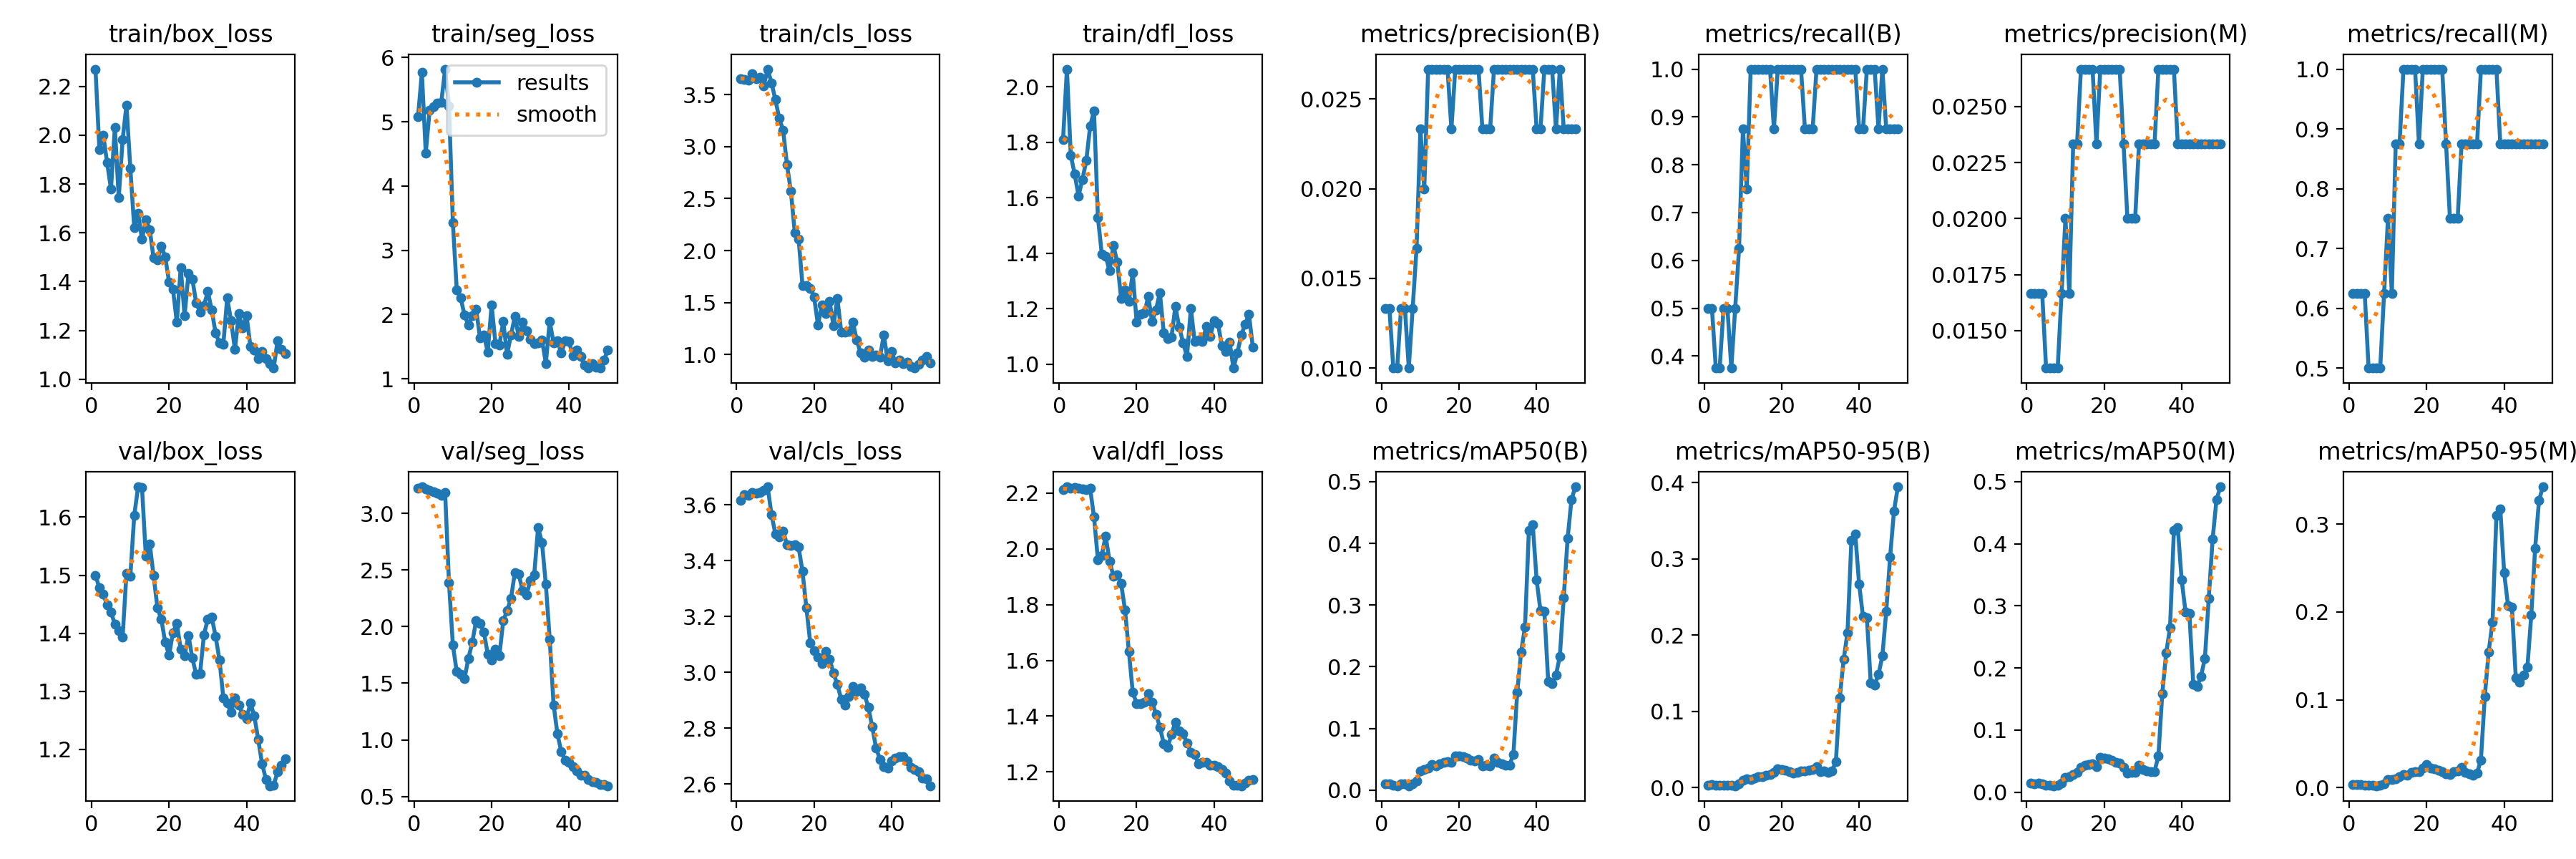

In [ ]:
# Result of the train results.
Image(os.path.join(train_path, 'results.png'))

#### Display labeled images

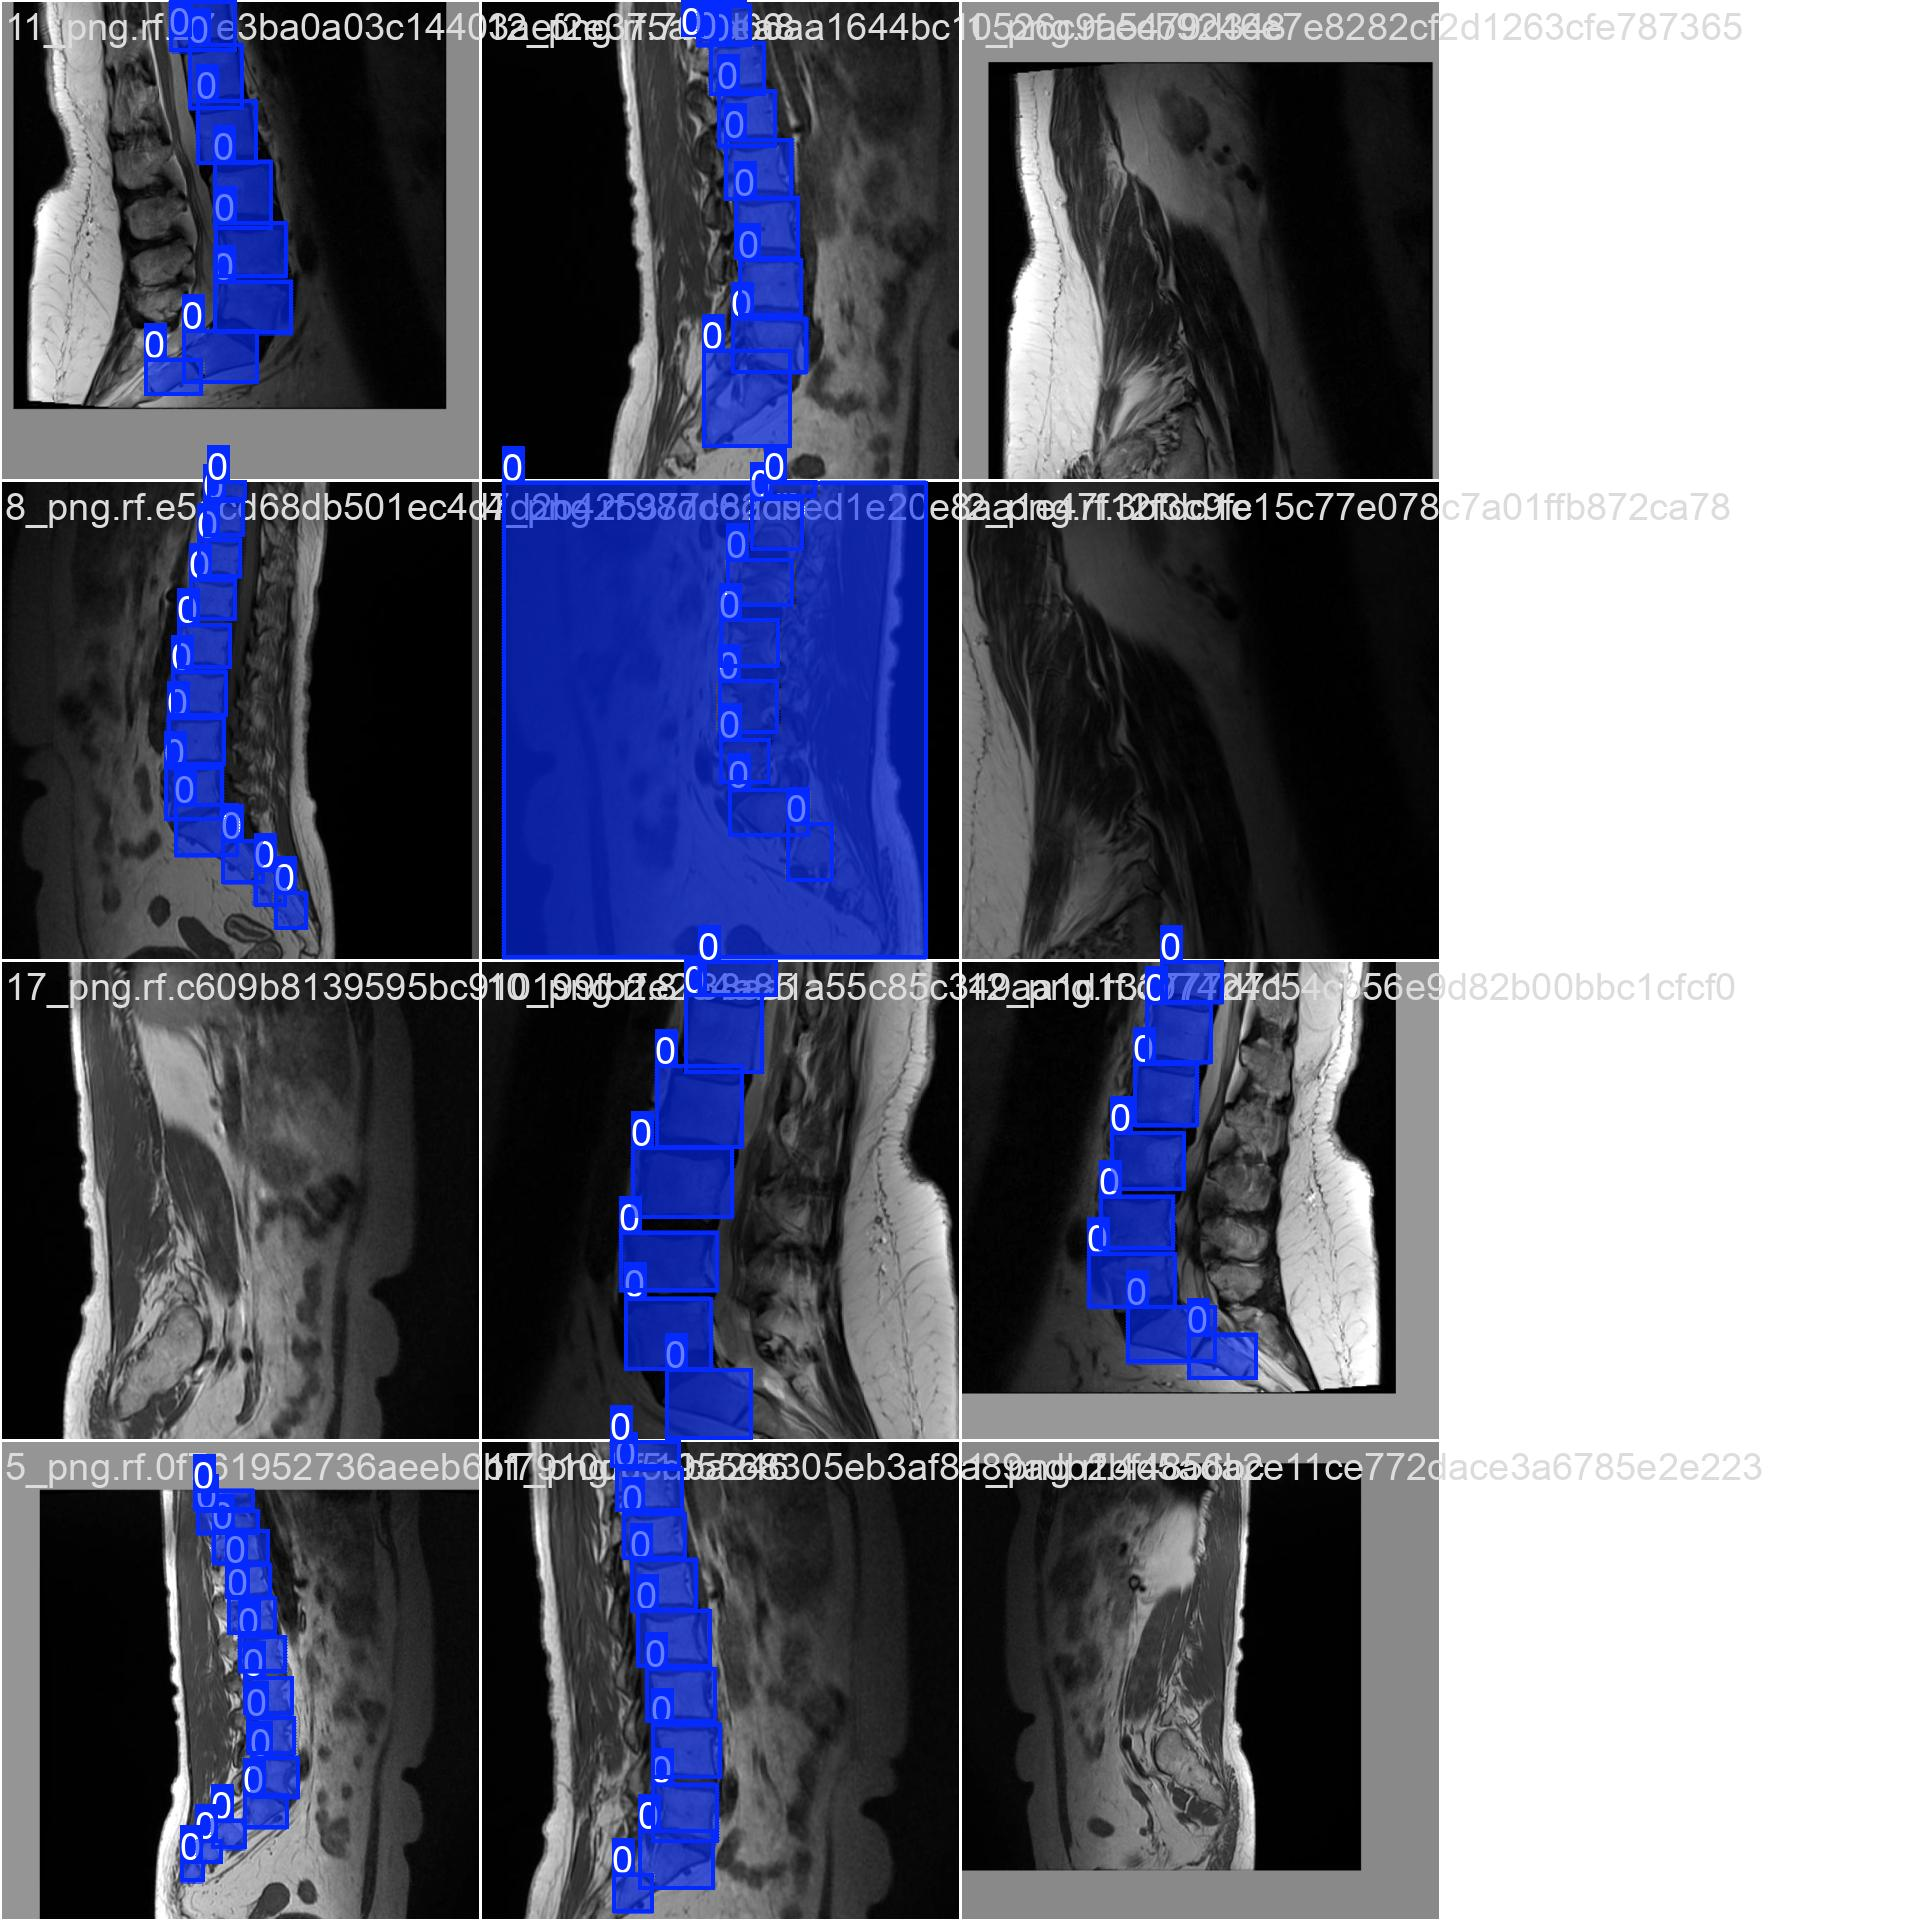

In [ ]:
random_image_path = os.path.join(train_path, 'train_batch40.jpg')
display(Image(filename=random_image_path))


The result of the training process is two files:
*   best.pt
*   last.pt

We are picking the best model.


In [ ]:
best_model_path = os.path.join(train_path, 'weights/best.pt')

best_model = YOLO(best_model_path)

#### Upload and Predict: Handling Image File Uploads in a Notebook

FileUpload(value={}, accept='image/*', description='Upload')

✅ Image saved to: /content/WhatsApp Image 2025-04-21 at 20.32.33_9b115302.jpg

image 1/1 /content/WhatsApp Image 2025-04-21 at 20.32.33_9b115302.jpg: 640x640 (no detections), 11.3ms
Speed: 3.0ms preprocess, 11.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


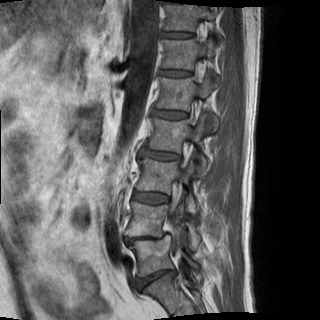

In [ ]:
# Global variables
uploaded_file_results = None
uploaded_image_path = None  # To store the saved path

# File picker
uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)

def handle_upload(change):
    global uploaded_file_results, uploaded_image_path

    if uploader.value:
        # Get uploaded file
        uploaded_file = list(uploader.value.values())[0]
        file_name = uploaded_file['metadata']['name']
        content = uploaded_file['content']

        # Save file to disk
        uploaded_image_path = os.path.join('/content', file_name)
        with open(uploaded_image_path, 'wb') as f:
            f.write(content)

        print(f"✅ Image saved to: {uploaded_image_path}")

        # Run prediction using the saved path
        uploaded_file_results = best_model.predict(uploaded_image_path, conf=0.5)
        uploaded_file_results[0].show()

uploader.observe(handle_upload, names='value')


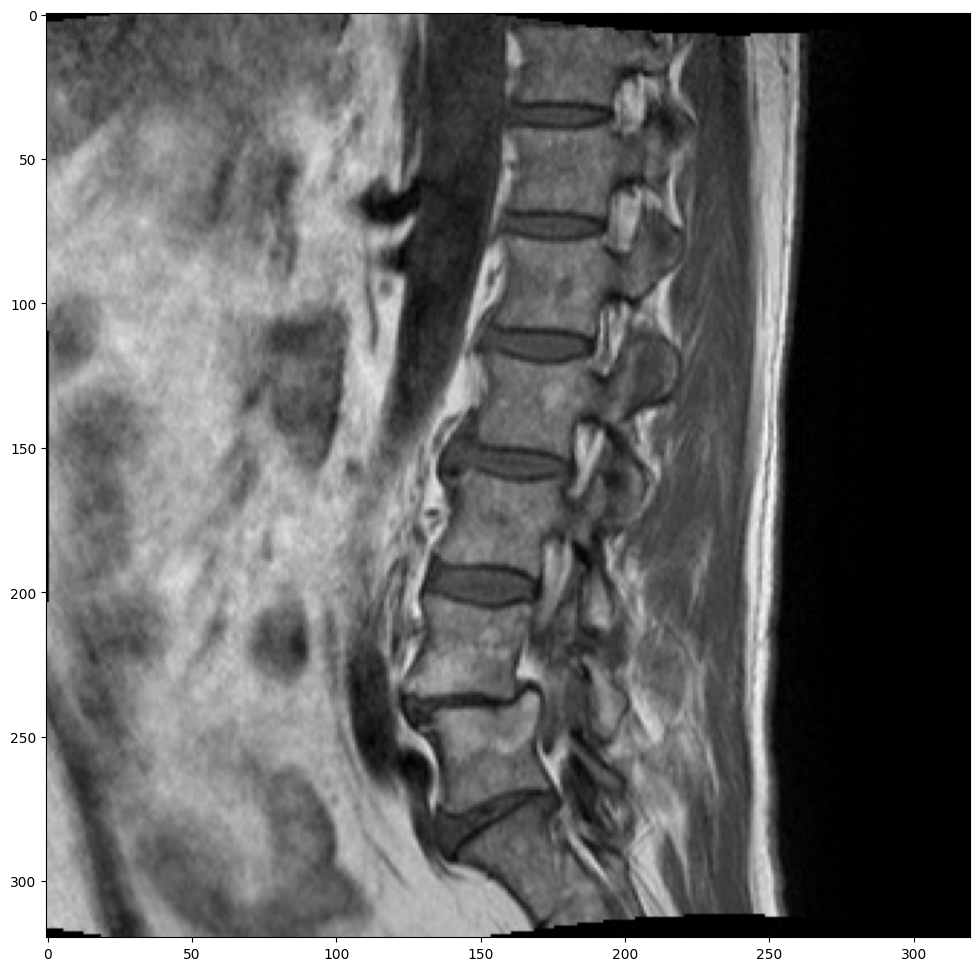

In [ ]:
test_result_array = uploaded_file_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(test_result_array)

In [ ]:
# Get the first result (assuming single image)
prediction = best_model(uploaded_image_path)


image 1/1 /content/WhatsApp Image 2025-04-21 at 20.32.33_9b115302.jpg: 640x640 (no detections), 9.5ms
Speed: 3.5ms preprocess, 9.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# Get the first result (assuming single image)
boxes = prediction[0].boxes

# Convert to numpy for easier handling
import numpy as np

for box in boxes:
    xyxy = box.xyxy.cpu().numpy()[0]  # [x1, y1, x2, y2]
    conf = box.conf.cpu().numpy()[0]  # confidence
    cls = int(box.cls.cpu().numpy()[0])  # class index

    print(f"Class: {cls}, Confidence: {conf:.2f}, BBox: {xyxy}")


# Helper function
Some helper function for PreProcess and AfterProcess.

In [ ]:
def plot_individual_bounding_boxes(model, image_path, min_confidence=0.25, plot_original=True):
    """
    Predicts objects using a YOLOv8 model, optionally plots the original image with predictions,
    and plots each high-confidence bounding box as a separate cropped image.

    Args:
        model (YOLO): Trained YOLOv8 segmentation or detection model.
        image_path (str): Path to the input image.
        min_confidence (float): Minimum confidence threshold to include detections.
        plot_original (bool): Whether to plot the original image with full predictions.

    Returns:
        List of cropped image regions (NumPy arrays) that passed the confidence threshold.
    """
    # Run prediction
    results = model(image_path)
    boxes = results[0].boxes

    # Load and convert image
    original_image = cv2.imread(image_path)
    if original_image is None:
        raise ValueError(f"Image not found at {image_path}")
    image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Plot original prediction image if requested
    if plot_original:
        prediction_image = results[0].plot()  # with boxes/masks
        plt.figure(figsize=(10, 10))
        plt.imshow(prediction_image)
        plt.title("Original Image with Predictions")
        plt.axis("off")
        plt.show()

    cropped_objects = []

    # Loop over boxes with confidence filter
    for i, box in enumerate(boxes):
        conf = float(box.conf.cpu().numpy()[0])
        if conf < min_confidence:
            continue

        xyxy = box.xyxy.cpu().numpy()[0]
        x1, y1, x2, y2 = map(int, xyxy)

        cropped = image_rgb[y1:y2, x1:x2]
        cropped_objects.append(cropped)

        # Plot each box
        plt.figure(figsize=(4, 4))
        plt.imshow(cropped)
        plt.title(f"Object {i+1} - Conf: {conf:.2f}")
        plt.axis("off")
        plt.show()

    return cropped_objects


def center_and_pad_crops(cropped_objects, target_width, target_height):
    """
    Pads and centers cropped images inside a fixed-size black canvas.

    Args:
        cropped_objects (list of np.ndarray): List of cropped RGB images.
        target_width (int): Desired output image width.
        target_height (int): Desired output image height.

    Returns:
        List of padded images (np.ndarray) with shape (target_height, target_width, 3).

    Raises:
        ValueError: If any cropped image is larger than the target size.
    """
    padded_images = []

    for i, crop in enumerate(cropped_objects):
        h, w = crop.shape[:2]

        if h > target_height or w > target_width:
            raise ValueError(f"Crop {i} is too large: {w}x{h} > {target_width}x{target_height}")

        # Create a black canvas
        canvas = np.zeros((target_height, target_width, 3), dtype=np.uint8)

        # Compute top-left corner to center the crop
        y_offset = (target_height - h) // 2
        x_offset = (target_width - w) // 2

        # Place the crop in the center
        canvas[y_offset:y_offset+h, x_offset:x_offset+w] = crop
        padded_images.append(canvas)

    return padded_images

def plot_ndarray_image(image, title="Image"):
    """
    Plots a single NumPy ndarray image using matplotlib.

    Args:
        image (np.ndarray): Image array to plot. Shape (H, W) or (H, W, 3).
        title (str): Optional title for the plot.

    Raises:
        TypeError: If input is not a NumPy array.
    """
    if not isinstance(image, np.ndarray):
        raise TypeError("Input must be a NumPy ndarray.")

    plt.figure(figsize=(5, 5))

    if image.ndim == 2:  # Grayscale
        plt.imshow(image, cmap='gray')
    elif image.ndim == 3 and image.shape[2] == 3:  # RGB
        plt.imshow(image)
    else:
        raise ValueError("Unsupported image shape. Expected (H, W) or (H, W, 3).")

    plt.title(title)
    plt.axis("off")
    plt.show()

In [ ]:
def prepare_unet_inputs(padded_images):
    """
    Prepares a batch of padded vertebra crops for U-Net model input.

    Args:
        padded_images (list of np.ndarray): List of RGB images (H, W, 3).

    Returns:
        torch.Tensor: Batch of normalized tensors (N, 3, H, W) ready for U-Net.
    """
    tensor_batch = []

    for img in padded_images:
        if img.ndim != 3 or img.shape[2] != 3:
            raise ValueError("All images must be RGB with shape (H, W, 3)")

        # Convert (H, W, 3) → (3, H, W) and normalize to [0, 1]
        img_tensor = torch.from_numpy(img.transpose(2, 0, 1)).float() / 255.0
        tensor_batch.append(img_tensor)

    return torch.stack(tensor_batch)  # (N, 3, H, W)

In [ ]:
cropped_objects = plot_individual_bounding_boxes(best_model, uploaded_image_path, min_confidence=0.5, plot_original=True)

In [ ]:
padded_crops  = center_and_pad_crops(cropped_objects, target_width = 128, target_height = 128)

In [ ]:
i = 0
for crop in padded_crops:
    plot_ndarray_image(crop, title=f"Padded Crop: {i}")
    i += 1


In [ ]:
# Step 2: Convert to tensor batch
batch_tensor = prepare_unet_inputs(padded_crops)

In [ ]:
import torch
import matplotlib.pyplot as plt

def plot_tensor_image(tensor, title="Tensor Image"):
    """
    Plots a torch.Tensor image using matplotlib.

    Args:
        tensor (torch.Tensor): Image tensor of shape (C, H, W) or (1, H, W) or (H, W).
        title (str): Title for the plot.

    Raises:
        TypeError: If the input is not a torch.Tensor.
        ValueError: If the tensor has an unsupported shape.
    """
    if not isinstance(tensor, torch.Tensor):
        raise TypeError("Input must be a torch.Tensor.")

    # Move to CPU and detach from computation graph
    tensor = tensor.detach().cpu()

    # Handle grayscale image
    if tensor.ndim == 2:  # (H, W)
        image = tensor.numpy()
        plt.imshow(image, cmap='gray')

    elif tensor.ndim == 3:
        if tensor.shape[0] == 1:  # (1, H, W) → grayscale
            image = tensor.squeeze(0).numpy()
            plt.imshow(image, cmap='gray')
        elif tensor.shape[0] == 3:  # (3, H, W) → RGB
            image = tensor.permute(1, 2, 0).numpy()
            plt.imshow(image)
        else:
            raise ValueError("Unsupported number of channels: expected 1 or 3.")

    else:
        raise ValueError("Tensor must have shape (H, W), (1, H, W), or (3, H, W).")

    plt.title(title)
    plt.axis("off")
    plt.show()


In [ ]:
i = 0
for crop in batch_tensor:
    plot_tensor_image(crop, title=f"Padded Crop: {i}")
    i += 1
